In [9]:
import numpy as np
import gensim.models
from gensim.models import Word2Vec

In [10]:
google_model_full = gensim.models.KeyedVectors.load_word2vec_format(
    '/Users/zhang/MscProject_tweak2vec/GoogleNews-vectors-negative300.bin',binary=True)

In [11]:
google_model_full['how']

array([ 0.26953125,  0.0859375 ,  0.09423828,  0.04101562, -0.18359375,
        0.12890625,  0.0625    , -0.10058594,  0.1484375 , -0.06591797,
        0.13671875, -0.19042969, -0.12255859, -0.05908203, -0.29492188,
        0.08496094, -0.02258301,  0.20410156, -0.05151367, -0.03295898,
       -0.08056641,  0.02624512,  0.02758789,  0.10107422, -0.01708984,
        0.10693359,  0.07324219, -0.11425781,  0.02111816,  0.06176758,
       -0.11035156,  0.29296875, -0.08789062, -0.19140625,  0.05834961,
        0.12695312,  0.22949219,  0.02575684,  0.03344727,  0.0255127 ,
        0.02624512,  0.0279541 ,  0.04711914, -0.0456543 , -0.06835938,
        0.05981445, -0.00946045,  0.00500488, -0.0144043 ,  0.08300781,
        0.0625    ,  0.03955078,  0.03515625, -0.17675781,  0.08300781,
       -0.06738281, -0.14550781,  0.07373047,  0.18847656,  0.0559082 ,
        0.09130859,  0.06933594, -0.15136719, -0.02307129, -0.07275391,
       -0.18457031,  0.06201172,  0.125     , -0.01055908, -0.02

In [2]:
google_model_20k = gensim.models.KeyedVectors.load_word2vec_format(
    '/Users/zhang/MscProject_tweak2vec/GoogleNews-vectors-negative300.bin',binary=True, limit=20000)
google_model_40k = gensim.models.KeyedVectors.load_word2vec_format(
    '/Users/zhang/MscProject_tweak2vec/GoogleNews-vectors-negative300.bin',binary=True, limit=40000)
google_model_1k = gensim.models.KeyedVectors.load_word2vec_format(
    '/Users/zhang/MscProject_tweak2vec/GoogleNews-vectors-negative300.bin',binary=True, limit=1000)

In [24]:
stack_corpus = list(np.load("/Users/zhang/MscProject_tweak2vec/corpus/stack_corpus_withunk200.npy"))

In [4]:
stack_model = Word2Vec(stack_corpus, sg=0, size=300,  window=5,  min_count=0)

In [2]:
quora_corpus = list(np.load("/Users/zhang/MscProject_tweak2vec/corpus/quora_corpus_withunk5.npy"))

In [3]:
quora_model = Word2Vec(quora_corpus, sg=0, size=300,  window=5,  min_count=0)

In [7]:
quora_model.save("/Users/zhang/MscProject_tweak2vec/word2vecModel/quora_model5")

In [10]:
items = quora_model.most_similar('step')
for item in items:
    print(item[0], item[1])

steps 0.508415162563324
checkmate 0.442869633436203
americamle 0.43342840671539307
invalid 0.4074963331222534
obi 0.39891305565834045
proving 0.38724929094314575
amphetamines 0.3826720714569092
monday 0.38219547271728516
abide 0.38051268458366394
robes 0.37509164214134216


/Users/zhang/anaconda/envs/mlp/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [13]:
stack_vocab_freq_list = np.load('/Users/zhang/MscProject_tweak2vec/corpus/stack_vocab200.npy')
stack_vocab_list = [w[0] for w in stack_vocab_freq_list]
stack_vocab_list.append('UNK')

In [14]:
stack_vocab_int = {word: ii+1 for ii, word in enumerate(stack_vocab_list)}

In [4]:
quora_vocab_freq_list = np.load('/Users/zhang/MscProject_tweak2vec/corpus/quora_vocab5.npy')
quora_vocab_list = [w[0] for w in quora_vocab_freq_list]
quora_vocab_list.append('UNK')

In [5]:
quora_word2int = {word: ii for ii, word in enumerate(quora_vocab_list)}

In [7]:
quora_wordVec = list()
google_wordVec = list()

init_width = 0.5 / 300


for word in quora_vocab_list:
    quora_wordVec.append(quora_model[word])
    if word in google_model_full:
        google_wordVec.append(google_model_full[word])
    if word not in google_model_full:
        #google_wordVec.append(google_model_full['UNK'])
        google_wordVec.append(2*init_width*np.random.random(300)-init_width)
    

/Users/zhang/anaconda/envs/mlp/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [8]:
np.save('gensim_quora.npy',np.array(quora_wordVec))

In [21]:
stack_wordVec = list()
stack_wordVec.append(np.zeros(300))
google_wordVec = list()
google_wordVec.append(np.zeros(300))
for word in stack_vocab_list:
    stack_wordVec.append(stack_model[word])
    if word in google_model_full:
        google_wordVec.append(google_model_full[word])
    if word not in google_model_full:
        #google_wordVec.append(google_model_full['UNK'])
        google_wordVec.append(0.5-np.random.random(300))
    

/Users/zhang/anaconda/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [33]:
np.save('word2vec_googlequora5.npy',np.array(google_wordVec))
np.save('word2vec_quora5.npy',np.array(quora_wordVec))

### PCA+visualization

In [116]:

from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
pca = PCA(n_components=2)

In [177]:
oov_list = list()
invocab_list = list()
for word in stack_vocab_list:
    if word not in google_model_1k:
        oov_list.append(word)
    if word in google_model_1k:
        invocab_list.append(word)
        
len(invocab_list)

714

In [184]:
google_pivot_vec = list()
stack_pivot_vec = list()
for word in invocab_list[0:10]:
    google_pivot_vec.append(google_model_40k[word])
    stack_pivot_vec.append(stack_model[word])

/Users/zhang/anaconda/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [186]:
np.save('google_pivot_vec.npy',np.array(google_pivot_vec))
np.save('stack_pivot_vec.npy',np.array(stack_pivot_vec))
np.save('invocab_list.npy',np.array(invocab_list))

In [154]:
google_pc = pca.fit_transform(google_pivot_vec)
stack_pc = pca.fit_transform(stack_pivot_vec)
google_pcDF = pd.DataFrame(data = google_pc
             , columns = ['pc 1', 'pc 2'])
stack_pcDF = pd.DataFrame(data = stack_pc
             , columns = ['pc 1', 'pc 2'])

In [166]:
start = 0
end = 50

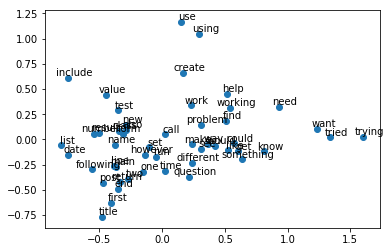

In [167]:
google_x = [w[0] for w in google_pc[start:end] ]
google_y = [w[1] for w in google_pc[start:end] ]
i=start
for a,b in zip(google_x,google_y):
    plt.text(a+0.05, b, invocab_list[i], ha='center', va= 'bottom',fontsize=10)
    i=i+1
plt.scatter(google_x, google_y)

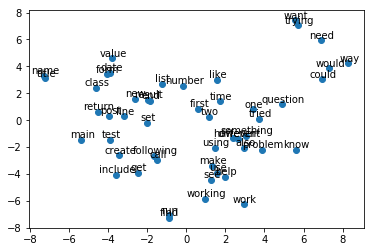

In [168]:
stack_x = [w[0] for w in stack_pc[start:end] ]
stack_y = [w[1] for w in stack_pc[start:end] ]
i=start
for a,b in zip(stack_x,stack_y):
    plt.text(a+0.05, b, invocab_list[i], ha='center', va= 'bottom',fontsize=10)
    i=i+1
plt.scatter(stack_x, stack_y)